## Combine Files

The script is for creating annula-mean surface fluxes from monthly NCAR data.

In [1]:
import xarray as xr
import numpy as np

In [26]:
ppdir = "/Users/hemantkhatri/OneDrive - The University of Liverpool/Work_Subpolar_Atlantic/Data/NCAR_CORE2_Surface_Flux/"

year1, year2 = (1949, 2007)

In [27]:
f = np.array([31., 28., 31., 30., 31. ,30., 31., 31., 30., 31., 30., 31.])
days = xr.DataArray(f, dims=['time'])

for yr in range(year1, year2):
    
    ds = xr.open_dataset(ppdir + str(yr) + ".nc", decode_times=False)
    
    ds_mean = (ds.drop('date') * days).mean('time') / days.mean('time')
        
    ds_mean = ds_mean.astype(np.float32).compute()
    
    save_file = ppdir + "annual/" + str(yr) + ".nc" 
    ds_mean.to_netcdf(save_file)

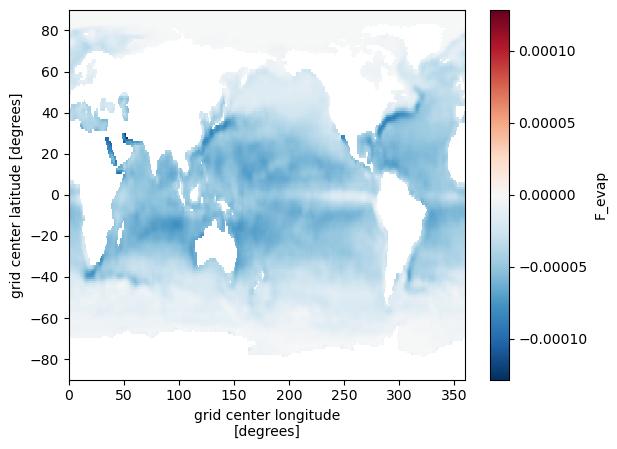

In [28]:
ds_mean['F_evap'].plot()